In [ ]:
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [47]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [48]:
origin=load_data('air_passengers')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (144, 2)
행 개수 : 144개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [49]:
df=origin.set_index('Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [50]:
p=2
d=2
q=2
yname='Passengers'

results=[]

for x in range(0,p+1):
    for y in range(0,d+1):
        for z in range(0,q+1):
            try:
                model=ARIMA(df[yname], order=(x,y,z), seasonal_order=(x,y,z,6))
                fit=model.fit()
                results.append({
                    'p':x,
                    'd':y,
                    'q':z,
                    'AIC':fit.aic,
                    'BIC':fit.bic
                })
            except Exception as e:
                continue

df_results=DataFrame(results)

# 방법 1 - 합산 점수 고려
# df_results['AIC_rank']=df_results['AIC'].rank()
# df_results['BIC_rank']=df_results['BIC'].rank()
# df_results['rank_sum']=df_results['AIC_rank']+df_results['BIC_rank']
# best_model=df_results.sort_values('rank_sum').iloc[0]

# 방법 2 - BIC우선 + AIC 보조 (보수적 기준)
best_model=df_results.sort_values(['BIC','AIC']).iloc[0]
best_model

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python

p         1.000000
d         2.000000
q         1.000000
AIC    1072.901835
BIC    1087.239507
Name: 16, dtype: float64

In [51]:
best_order=(int(best_model['p']), int(best_model['d']), int(best_model['q']))
s_best_order=(int(best_model['p']), int(best_model['d']), int(best_model['q']), 6)

final_model=ARIMA(df[yname], order=best_order, seasonal_order=s_best_order)
final_fit=final_model.fit()
print(final_fit.summary())

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:                      Passengers   No. Observations:                  144
Model:             ARIMA(1, 2, 1)x(1, 2, 1, 6)   Log Likelihood                -531.451
Date:                         Thu, 18 Dec 2025   AIC                           1072.902
Time:                                 15:38:31   BIC                           1087.240
Sample:                             01-01-1949   HQIC                          1078.728
                                  - 12-01-1960                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2969      0.080     -3.709      0.000      -0.454      -0.140
ma.L1         -0.9996      5.635     -0.177      0.859     

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
df2=df.copy()
df2['pred']=fit.fittedvalues
df2.head()

,Passengers,pred
Month,,
1949-01-01,112,0.000000
1949-02-01,118,194.445102
1949-03-01,132,127.029841
1949-04-01,129,145.056588
1949-05-01,121,126.210041


In [53]:
fc=fit.forecast(12)
fc

1961-01-01    448.407470
1961-02-01    419.224376
1961-03-01    444.209056
1961-04-01    487.239580
1961-05-01    496.840956
1961-06-01    563.045412
1961-07-01    654.262513
1961-08-01    635.664972
1961-09-01    533.310876
1961-10-01    485.670084
1961-11-01    411.744318
1961-12-01    456.622878
Freq: MS, Name: predicted_mean, dtype: float64

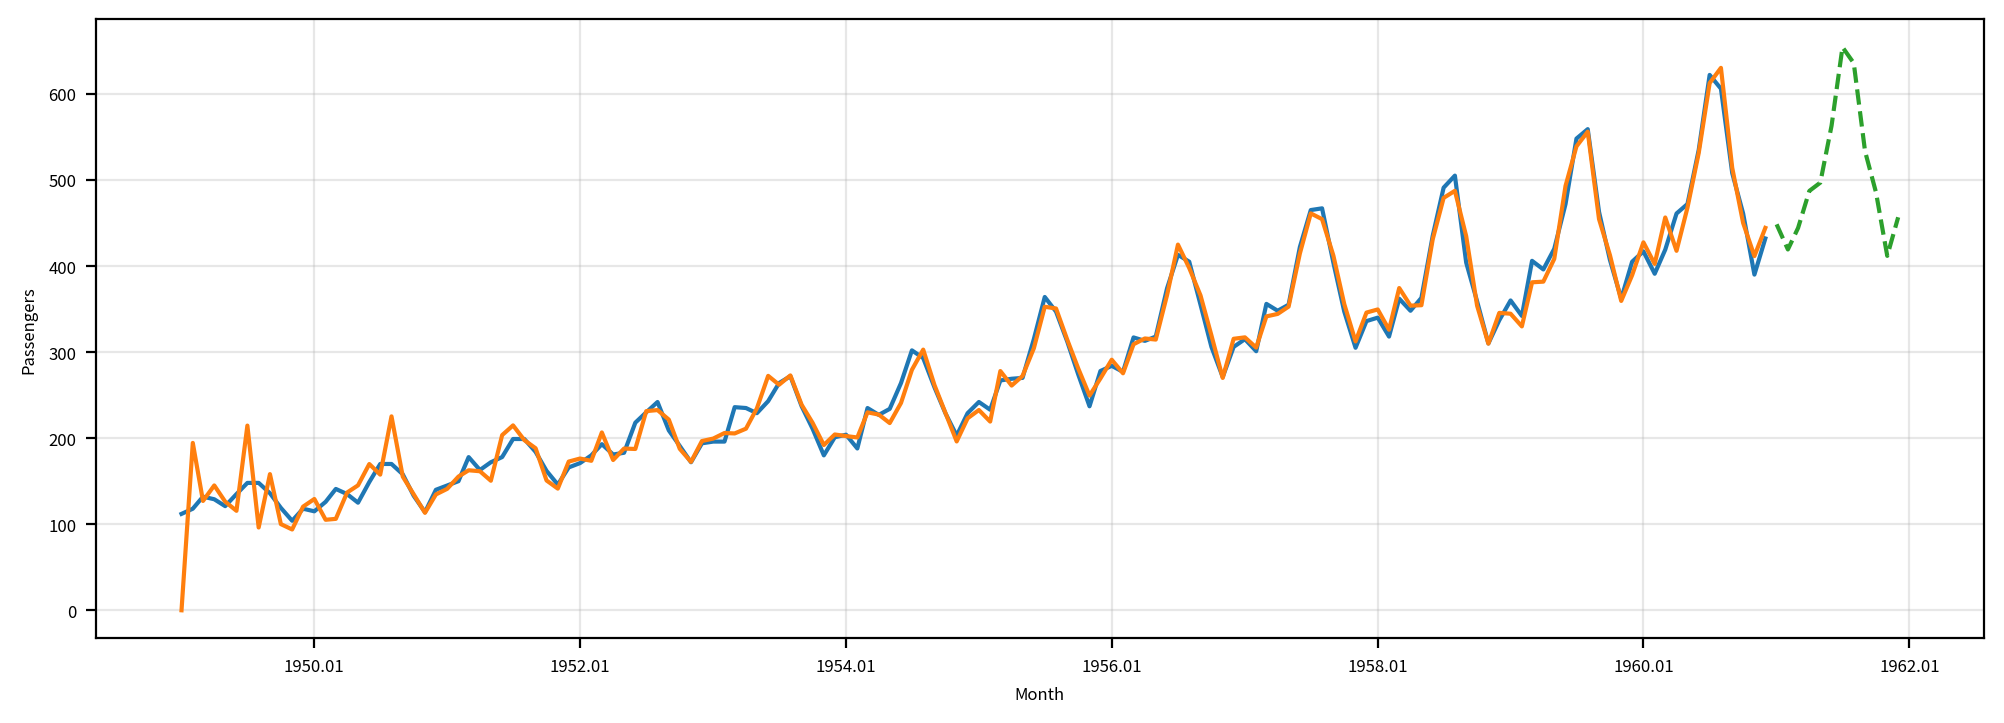

In [54]:
# 1. 그래프 초기화
width_px=2000
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.lineplot(data=df2, x=df2.index, y=yname)
sb.lineplot(data=df2, x=df2.index, y='pred')
sb.lineplot(x=fc.index, y=fc.values, linestyle='--')

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)
monthyearFmt=dates.DateFormatter('%Y.%m')
ax.xaxis.set_major_formatter(monthyearFmt)

# 4. 출력
plt.tight_layout()
plt.show()
plt.close()

In [55]:
def arima_report(fit, data, threshold=0.05):
    cdf=DataFrame({
        'Log Likelihood':[fit.llf],
        'AIC':[fit.aic],
        'BIC':[fit.bic],
        'HQIC':[fit.hqic],
        '관측치 수':[fit.nobs]
    })

    params=fit.params
    bse=fit.bse
    zvals=params/bse
    pvals=fit.pvalues
    conf=fit.conf_int()

    rows=[]
    for name in params.index:
        p=pvals[name]
        stars=(
            '***' if p<0.001 else
            '**' if p<0.01 else
            '*' if p<0.05 else
            ''
        )

        rows.append({
            '변수':name,
            '계수':params[name],
            '표준오차':bse[name],
            'z':f'{zvals[name]:.3f}{stars}',
            'p-value':p,
            'CI_lower':conf.loc[name,0],
            'CI_upper':conf.loc[name,1]
        })

    rdf=DataFrame(rows)

    result_report=(
        f'Log Likelihood = {fit.llf:.3f}, '
        f'AIC = {fit.aic:.3f}, '
        f'BIC = {fit.bic:.3f}.'
    )

    model_report=(
        f'ARIMA{fit.model.order}x{fit.model.seasonal_order} 모형을 적합한 결과, '
        f'AIC {fit.aic:.3f}, BIC {fit.bic:.3f}로 나타났으며 '
        f'잔차의 자기상관은 Ljung-Box 검정에서 유의하지 않았다.'
    )

    variable_reports=[]

    for _, row in rdf.iterrows():
        variable_reports.append(
            f'{row['변수']} 계수는 {row['계수']:.3f}로 '
            f'통계적으로 {'유의하다' if row['p-value']<threshold else '유의하지 않다'} '
            f'(p {'<' if row['p-value']<threshold else '>'} {threshold}).'
        )

    return cdf, rdf, result_report, model_report, variable_reports

In [56]:
cdf, rdf, r, m, v = arima_report(fit, df2)
display(cdf)
display(rdf)
display(r)
display(m)
display(v)

,Log Likelihood,AIC,BIC,HQIC,관측치 수
0,-531.382329,1080.764659,1106.572469,1091.251235,144


,변수,계수,표준오차,z,p-value,CI_lower,CI_upper
0,ar.L1,0.673445,7.759308,0.087,0.930837,-14.534520,15.881409
1,ar.L2,0.323082,2.533299,0.128,0.898518,-4.642093,5.288258
2,ma.L1,-1.987613,4.177075,-0.476,0.634189,-10.174529,6.199303
3,ma.L2,0.988454,4.106164,0.241,0.809769,-7.059480,9.036388
4,ar.S.L6,-1.978158,0.473046,-4.182***,0.000029,-2.905312,-1.051005
5,ar.S.L12,-0.978567,0.469833,-2.083*,0.037270,-1.899422,-0.057712
6,ma.S.L6,-0.036080,5.545923,-0.007,0.994809,-10.905889,10.833730
7,ma.S.L12,-0.963808,5.348598,-0.180,0.856997,-11.446868,9.519252
8,sigma2,124.635234,2138.878897,0.058,0.953533,-4067.490372,4316.760839


'Log Likelihood = -531.382, AIC = 1080.765, BIC = 1106.572.'

'ARIMA(2, 2, 2)x(2, 2, 2, 6) 모형을 적합한 결과, AIC 1080.765, BIC 1106.572로 나타났으며 잔차의 자기상관은 Ljung-Box 검정에서 유의하지 않았다.'

['ar.L1 계수는 0.673로 통계적으로 유의하지 않다 (p > 0.05).',
 'ar.L2 계수는 0.323로 통계적으로 유의하지 않다 (p > 0.05).',
 'ma.L1 계수는 -1.988로 통계적으로 유의하지 않다 (p > 0.05).',
 'ma.L2 계수는 0.988로 통계적으로 유의하지 않다 (p > 0.05).',
 'ar.S.L6 계수는 -1.978로 통계적으로 유의하다 (p < 0.05).',
 'ar.S.L12 계수는 -0.979로 통계적으로 유의하다 (p < 0.05).',
 'ma.S.L6 계수는 -0.036로 통계적으로 유의하지 않다 (p > 0.05).',
 'ma.S.L12 계수는 -0.964로 통계적으로 유의하지 않다 (p > 0.05).',
 'sigma2 계수는 124.635로 통계적으로 유의하지 않다 (p > 0.05).']